In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import pandas_profiling
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv('up-yoddha.csv',index_col=0)

In [3]:
df.head()

,OVERALL,SEASON 7,SEASON 6,SEASON 5,Team-name
SEASONS,,,,,
MATCHES PLAYED,65.0,17.0,25.0,23.0,up-yoddha
WINS,27.0,9.0,10.0,8.0,up-yoddha
DRAWS,10.0,2.0,4.0,4.0,up-yoddha
LOSSES,28.0,6.0,11.0,11.0,up-yoddha
FINISHING POSITION,0.0,4.0,3.0,3.0,up-yoddha


In [4]:
df1 = df.transpose()

In [5]:
df2 = df1.apply(pd.to_numeric, errors='coerce')

In [6]:
df2

SEASONS,MATCHES PLAYED,WINS,DRAWS,LOSSES,FINISHING POSITION,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,...,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS
OVERALL,65.0,27.0,10.0,28.0,0.0,2781.0,923.0,648.0,1210.0,0.42,...,308.0,1179.0,1534.0,590.0,944.0,0.42,60.0,69.0,138.0,646.0
SEASON 7,17.0,9.0,2.0,6.0,4.0,711.0,208.0,172.0,331.0,0.38,...,63.0,269.0,389.0,167.0,222.0,0.46,14.0,20.0,40.0,180.0
SEASON 6,25.0,10.0,4.0,11.0,3.0,1068.0,357.0,255.0,456.0,0.42,...,131.0,449.0,594.0,240.0,354.0,0.45,27.0,26.0,52.0,265.0
SEASON 5,23.0,8.0,4.0,11.0,3.0,1002.0,358.0,221.0,423.0,0.46,...,114.0,461.0,551.0,183.0,368.0,0.36,19.0,23.0,46.0,201.0
Team-name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2['WIN%'] = df2['WINS']/df2['MATCHES PLAYED']
df2['DRAW%'] = df2['DRAWS']/df2['MATCHES PLAYED']
df2['LOSS%'] = df2['LOSSES']/df2['MATCHES PLAYED']
df2['WIN-LOSS%'] = df2['WINS']/df2['LOSSES']


In [9]:
df2.dtypes

SEASONS
MATCHES PLAYED          float64
WINS                    float64
DRAWS                   float64
LOSSES                  float64
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESSFUL RAIDS        float64
UNSUCCESSFUL RAID       float64
EMPTY RAIDS             float64
SUCCESS RAID %          float64
NO. OF SUPER RAIDS      float64
RAID TOUCH POINTS       float64
RAID BONUS POINTS       float64
TOTAL RAID POINTS       float64
TOTAL TACKLES           float64
SUCCESSFUL TACKLES      float64
UNSUCCESFUL TACKLES     float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
ALL OUTS INFLICTED      float64
TOTAL ALL OUT POINTS    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
dtype: object

In [10]:
df2['UNSUCCESSFUL RAID%'] = df2['UNSUCCESSFUL RAID']/df2['TOTAL RAIDS']
df2['EMPTY RAID%'] = df2['EMPTY RAIDS']/df2['TOTAL RAIDS']
df2['AVG_RAID_TOUCH_POINT'] = df2['RAID TOUCH POINTS']/df2['MATCHES PLAYED']
df2['AVG_RAID_BONUS_POINT'] = df2['RAID BONUS POINTS']/df2['MATCHES PLAYED']
df2['UNSUCCESSFUL TACKLE%'] = df2['UNSUCCESFUL TACKLES']/df2['TOTAL TACKLES']
df2['AVG_ALL_OUTS'] = df2['ALL OUTS INFLICTED']/df2['MATCHES PLAYED']

In [11]:
df6 = df2.drop(['MATCHES PLAYED','WINS','DRAWS','LOSSES','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS','NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS'],axis=1)

In [12]:
df6 = df6.drop(['Team-name'],axis=0)
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,2781.0,0.42,0.42,60.0,646.0,0.415385,0.153846,0.430769,0.964286,0.233010,0.435095,13.400000,4.738462,0.615385,1.061538
SEASON 7,4.0,711.0,0.38,0.46,14.0,180.0,0.529412,0.117647,0.352941,1.500000,0.241913,0.465541,12.117647,3.705882,0.570694,1.176471
SEASON 6,3.0,1068.0,0.42,0.45,27.0,265.0,0.400000,0.160000,0.440000,0.909091,0.238764,0.426966,12.720000,5.240000,0.595960,1.040000
SEASON 5,3.0,1002.0,0.46,0.36,19.0,201.0,0.347826,0.173913,0.478261,0.727273,0.220559,0.422156,15.086957,4.956522,0.667877,1.000000


In [13]:
df6.dtypes

SEASONS
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESS RAID %          float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64
AVG_ALL_OUTS            float64
dtype: object

In [14]:
df6.corr().iplot(kind='heatmap',colorscale='ylgn')

In [15]:
df3= df2.loc['SEASON 5',:]

In [16]:
df3 

SEASONS
MATCHES PLAYED            23.000000
WINS                       8.000000
DRAWS                      4.000000
LOSSES                    11.000000
FINISHING POSITION         3.000000
TOTAL RAIDS             1002.000000
SUCCESSFUL RAIDS         358.000000
UNSUCCESSFUL RAID        221.000000
EMPTY RAIDS              423.000000
SUCCESS RAID %             0.460000
NO. OF SUPER RAIDS        23.000000
RAID TOUCH POINTS        347.000000
RAID BONUS POINTS        114.000000
TOTAL RAID POINTS        461.000000
TOTAL TACKLES            551.000000
SUCCESSFUL TACKLES       183.000000
UNSUCCESFUL TACKLES      368.000000
SUCCESSFUL TACKLE %        0.360000
NO. OF SUPER TACKLES      19.000000
ALL OUTS INFLICTED        23.000000
TOTAL ALL OUT POINTS      46.000000
TOTAL DEFENCE POINTS     201.000000
WIN%                       0.347826
DRAW%                      0.173913
LOSS%                      0.478261
WIN-LOSS%                  0.727273
UNSUCCESSFUL RAID%         0.220559
EMPTY RAID%         

In [17]:
df3.iplot(kind='bar')

In [18]:
df4 =df6.drop('FINISHING POSITION',axis=1)
df4 =df4.drop(['SEASON 7'])
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,2781.0,0.42,0.42,60.0,646.0,0.415385,0.153846,0.430769,0.964286,0.233010,0.435095,13.400000,4.738462,0.615385,1.061538
SEASON 6,1068.0,0.42,0.45,27.0,265.0,0.400000,0.160000,0.440000,0.909091,0.238764,0.426966,12.720000,5.240000,0.595960,1.040000
SEASON 5,1002.0,0.46,0.36,19.0,201.0,0.347826,0.173913,0.478261,0.727273,0.220559,0.422156,15.086957,4.956522,0.667877,1.000000


In [19]:
df5 = df6['FINISHING POSITION']
df5 = df5.drop(['SEASON 7'],axis=0)
#df5['FINISHING POSITION'] = df['FINISHING POSITION'].fillna(0)
df5

OVERALL     0.0
SEASON 6    3.0
SEASON 5    3.0
Name: FINISHING POSITION, dtype: float64

In [20]:
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,2781.0,0.42,0.42,60.0,646.0,0.415385,0.153846,0.430769,0.964286,0.233010,0.435095,13.400000,4.738462,0.615385,1.061538
SEASON 6,1068.0,0.42,0.45,27.0,265.0,0.400000,0.160000,0.440000,0.909091,0.238764,0.426966,12.720000,5.240000,0.595960,1.040000
SEASON 5,1002.0,0.46,0.36,19.0,201.0,0.347826,0.173913,0.478261,0.727273,0.220559,0.422156,15.086957,4.956522,0.667877,1.000000


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = df4
y= df5
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


(3, 6)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['FEATURES','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                FEATURES        Score
0            TOTAL RAIDS  1256.860853
4   TOTAL DEFENCE POINTS   306.778777
3   NO. OF SUPER TACKLES    25.830189
12  AVG_RAID_BONUS_POINT     0.017336
8              WIN-LOSS%     0.016416


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[0.1   0.    0.    0.3   0.1   0.025 0.2   0.    0.175 0.    0.    0.
 0.1   0.    0.   ]


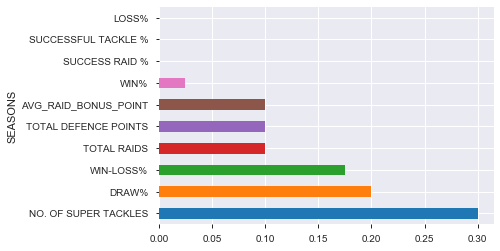

In [23]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [24]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['TOTAL RAIDS', 'SUCCESS RAID %', 'SUCCESSFUL TACKLE %',
       'NO. OF SUPER TACKLES', 'TOTAL DEFENCE POINTS', 'WIN%', 'LOSS%',
       'WIN-LOSS%', 'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT',
       'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS'],
      dtype='object')


In [25]:
X_features = df4.filter(['TOTAL RAIDS', 'SUCCESS RAID %', 'SUCCESSFUL TACKLE %',
       'NO. OF SUPER TACKLES', 'TOTAL DEFENCE POINTS', 'WIN%', 'LOSS%',
       'WIN-LOSS%', 'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT',
       'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS'],axis=1)
X_features.shape

(3, 12)

In [60]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks


Using Theano backend.



You can find the C code in this temporary file: C:\Users\ANINDA~1.BHA\AppData\Local\Temp\theano_compilation_error_8zu6v22h


AttributeError: module 'theano' has no attribute 'gof'

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_features, y, epochs=150, batch_size=10)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_features, y)
print('Accuracy: %.2f' % (accuracy*100))

In [26]:
f_select =['TOTAL RAIDS', 'SUCCESS RAID %', 'SUCCESSFUL TACKLE %',
       'NO. OF SUPER TACKLES', 'TOTAL DEFENCE POINTS', 'WIN%', 'LOSS%',
       'WIN-LOSS%', 'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT',
       'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS']
f_select

['TOTAL RAIDS',
 'SUCCESS RAID %',
 'SUCCESSFUL TACKLE %',
 'NO. OF SUPER TACKLES',
 'TOTAL DEFENCE POINTS',
 'WIN%',
 'LOSS%',
 'WIN-LOSS%',
 'AVG_RAID_TOUCH_POINT',
 'AVG_RAID_BONUS_POINT',
 'UNSUCCESSFUL TACKLE%',
 'AVG_ALL_OUTS']

In [27]:
#Using PCA to transform and decouple the dataset defined by the selected features
from sklearn.decomposition import PCA
pca = PCA()  
XX = pca.fit_transform(X[f_select]) # XX is out new training matrix that has two basis vectors
XX

array([[ 1.19637451e+03, -1.04767951e+00,  2.61793535e-15],
       [-5.58612195e+02,  2.42777586e+01,  2.61793535e-15],
       [-6.37762317e+02, -2.32300791e+01,  2.61793535e-15]])

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,2781.0,0.42,0.42,60.0,646.0,0.415385,0.153846,0.430769,0.964286,0.233010,0.435095,13.400000,4.738462,0.615385,1.061538
SEASON 7,4.0,711.0,0.38,0.46,14.0,180.0,0.529412,0.117647,0.352941,1.500000,0.241913,0.465541,12.117647,3.705882,0.570694,1.176471
SEASON 6,3.0,1068.0,0.42,0.45,27.0,265.0,0.400000,0.160000,0.440000,0.909091,0.238764,0.426966,12.720000,5.240000,0.595960,1.040000
SEASON 5,3.0,1002.0,0.46,0.36,19.0,201.0,0.347826,0.173913,0.478261,0.727273,0.220559,0.422156,15.086957,4.956522,0.667877,1.000000


In [30]:
X_train = X
y_train =y 
X_test = df6.drop(['SEASON 6','SEASON 5','OVERALL'],axis=0)
X_test = X_test.drop(['FINISHING POSITION'], axis=1)
y_test = df6['FINISHING POSITION']
y_test = y_test.drop(['SEASON 6','SEASON 5','OVERALL'],axis=0)

In [31]:
X_test

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
SEASON 7,711.0,0.38,0.46,14.0,180.0,0.529412,0.117647,0.352941,1.5,0.241913,0.465541,12.117647,3.705882,0.570694,1.176471


In [32]:
y_test

SEASON 7    4.0
Name: FINISHING POSITION, dtype: float64

In [33]:
# machine learning
from sklearn.svm import SVC
from sklearn import preprocessing
#import fancyimpute
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#  Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Models
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [34]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[14:33:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.9248	validation_1-rmse:3.33333
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1.79713	validation_1-rmse:3.17778
[2]	validation_0-rmse:1.67796	validation_1-rmse:3.03259
[3]	validation_0-rmse:1.56671	validation_1-rmse:2.89709
[4]	validation_0-rmse:1.46286	validation_1-rmse:2.77061
[5]	validation_0-rmse:1.3659	validation_1-rmse:2.65257
[6]	validation_0-rmse:1.2754	validation_1-rmse:2.5424
[7]	validation_0-rmse:1.19091	validation_1-rmse:2.43958
[8]	validation_0-rmse:1.11203	validation_1-rmse:2.3436
[9]	validation_0-rmse:1.0384	validation_1-rmse:2.25403
[10]	validation_0-rmse:0.969654	validation_1-rmse:2.17043
[11]	validation_0-rmse:0.905477	validation_1-rmse:2.0924
[12]	val

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[78]	validation_0-rmse:0.010101	validation_1-rmse:1.01074
[79]	validation_0-rmse:0.009469	validation_1-rmse:1.01002
[80]	validation_0-rmse:0.008878	validation_1-rmse:1.00935
[81]	validation_0-rmse:0.008325	validation_1-rmse:1.00873
[82]	validation_0-rmse:0.007808	validation_1-rmse:1.00815
[83]	validation_0-rmse:0.007323	validation_1-rmse:1.0076
[84]	validation_0-rmse:0.006869	validation_1-rmse:1.0071
[85]	validation_0-rmse:0.006445	validation_1-rmse:1.00662
[86]	validation_0-rmse:0.006047	validation_1-rmse:1.00618
[87]	validation_0-rmse:0.005675	validation_1-rmse:1.00577
[88]	validation_0-rmse:0.005326	validation_1-rmse:1.00539
[89]	validation_0-rmse:0.004999	validation_1-rmse:1.00503
[90]	validation_0-rmse:0.004693	validation_1-rmse:1.00469
[91]	validation_0-rmse:0.004407	validation_1-rmse:1.00438
[92]	validation_0-rmse:0.004138	validation_1-rmse:1.00409
[93]	validation_0-rmse:0.003886	validation_1-rmse:1.00381
[94]	validation_0-rmse:0.003651	validation_1-rmse:1.00356
[95]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [35]:
pred  = pd.DataFrame()
pred['MW_Prediction'] = reg.predict(X_test)


In [36]:
pred['MW_Prediction']

0    2.999464
Name: MW_Prediction, dtype: float32

In [37]:
predict = reg.predict(X_test)
predictions = [round(value) for value in predict]
predictions

[3.0]

## Finding the win-loss% of a team for Season 7

In [38]:
df6.loc['SEASON 7','WIN-LOSS%']

1.5

## Finding the successful Raid %(successful raid/ total raid) for season 7

In [39]:
SUCC_RAID =df2.loc['SEASON 7','SUCCESSFUL RAIDS']
TOT_RAID = df2.loc['SEASON 7','TOTAL RAIDS']

SUCC_RAID_PERC = SUCC_RAID/TOT_RAID
SUCC_RAID_PERC

0.29254571026722925

## Finding the OVERALL successful Raid %(successful raid/ total raid) of a team

In [40]:
SUCC_RAID_OV =df2.loc['OVERALL','SUCCESSFUL RAIDS']
TOT_RAID_OV = df2.loc['OVERALL','TOTAL RAIDS']

SUCC_RAID_PERC_OV = SUCC_RAID_OV/TOT_RAID_OV
SUCC_RAID_PERC_OV

0.3318950017979144

## Finding the Super-performance total of the team

In [41]:
SUPER_RAIDS = df2.loc['SEASON 7','NO. OF SUPER RAIDS']
SUPER_TACKLES = df2.loc['SEASON 7','NO. OF SUPER TACKLES']
All_OUTS_INFLICTED = df2.loc['SEASON 7','ALL OUTS INFLICTED']
All_OUTS_CONCEDED = 22

SPT = SUPER_RAIDS+SUPER_TACKLES+All_OUTS_INFLICTED-All_OUTS_CONCEDED
SPT

16.0